In [3]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import cmath
from math import e, pi
import numpy as np

[8.42145523e-08 5.89501866e-07 1.76850560e-06 2.94750933e-06
 2.94750933e-06 1.76850560e-06 5.89501866e-07 8.42145523e-08]
[  1.          -6.5165353   18.3793822  -29.07520967  27.85627437
 -16.16085315   5.25628756  -0.73933523]


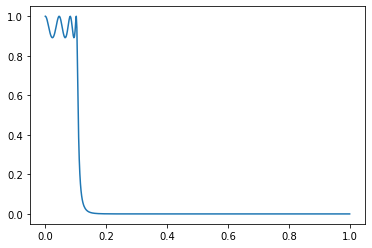

(1.0000000001929017+0j)


In [195]:

#a window that we can test with#a windo 
samplerate = 48000
order = 7
ripple = 1
cuttoff = 2500
b, a = sig.cheby1(order, ripple, cuttoff, 'low', fs=samplerate)
#b, a = sig.butter(order, cuttoff, 'low', fs=samplerate)
print(b)
print(a)
#plot this for show
w, h = sig.freqz(b, a)
plt.plot(w/np.pi, np.abs(h))
plt.show()
print(h[0])

In [196]:
def get_response( b, a, samplerate, n=100 ):
    
    niq = samplerate//2

    output = np.full( n, 0.0 )
    
    inc =  ( niq / n )
    freq = 1
    for i in range( n ):
        
        w = pi * ( freq / niq )
        freq += inc
        
        z = e ** ( 1j * w )
        SUM_B = b[0]
        SUM_A = a[0]
    
        if (len(a) == len(b)):

            for k in range(1, len(b)):
                SUM_B += b[k] * ( z**k )
                SUM_A +=  a[k] * ( z**k )
                
                
        else:
            
            for k in range(1, len(b)):
                SUM_B += b[k] * ( z**k )

            for k in range(1, len(a)):
                SUM_A +=  a[k] * ( z**k )

        output[i] = abs( SUM_B / SUM_A )
    
    return output
        
    

In [197]:
print(b, a)
f_r = get_response(b, a , samplerate, 2000)

[8.42145523e-08 5.89501866e-07 1.76850560e-06 2.94750933e-06
 2.94750933e-06 1.76850560e-06 5.89501866e-07 8.42145523e-08] [  1.          -6.5165353   18.3793822  -29.07520967  27.85627437
 -16.16085315   5.25628756  -0.73933523]


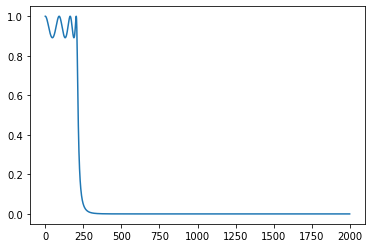

In [198]:
plt.plot(f_r)
plt.show()

In [199]:
sos = sig.tf2sos(b, a)
print(sos)

[[ 8.42145523e-08  1.69565288e-07  8.53554862e-08  1.00000000e+00
  -9.34396794e-01  0.00000000e+00]
 [ 1.00000000e+00  2.00309452e+00  1.00314983e+00  1.00000000e+00
  -1.86195462e+00  8.85494837e-01]
 [ 1.00000000e+00  1.99070689e+00  9.90760752e-01  1.00000000e+00
  -1.85300625e+00  9.20215022e-01]
 [ 1.00000000e+00  9.92707048e-01  0.00000000e+00  1.00000000e+00
  -1.86717763e+00  9.71034611e-01]]


In [200]:
#A wrapper function for sos filters

def sos_freqz(sos, samplerate, numSamples):
    
    output = np.full(numSamples, 1.0)
    
    for i in range(len(sos)):
        
        output *= get_response(sos[i][:3], sos[i][3:], samplerate, numSamples)
        
    return output

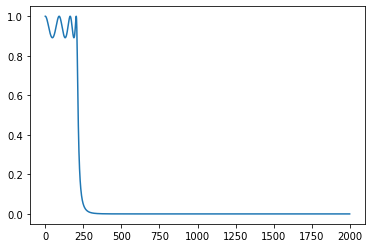

In [201]:
plt.plot(sos_freqz(sos, samplerate, 2000))
plt.show()

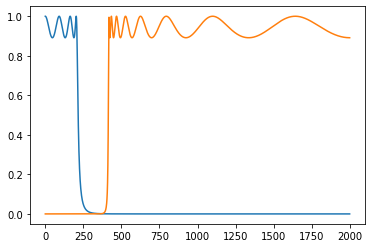

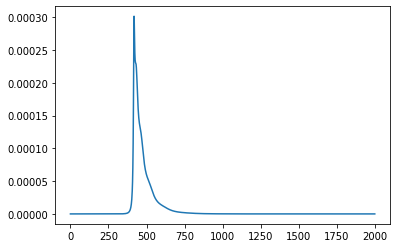

In [202]:
def comb_fr(lowSos, highSos, sampleRate, numSamples):
    plt.plot(sos_freqz(lowSos, samplerate, numSamples))
    plt.plot(sos_freqz(highSos, samplerate, numSamples))
    plt.show()
    
    return sos_freqz(lowSos, samplerate, numSamples) * sos_freqz(highSos, samplerate, numSamples)


lowSos = sos
bb, aa = sig.cheby1(16, ripple, 5000, 'high', fs=samplerate)
highSos = sig.tf2sos(bb, aa)
plt.plot(comb_fr(lowSos, highSos, samplerate, 2000))
plt.show()

In [319]:
#a freqz function that outputs a scaled array of log(2)

def get_response_log2( b, a, samplerate, n=100 ):
    
    niq = samplerate//2
    inc = np.log2(niq) / n
    print(inc)
    
    print ("normal inc : {}".format(np.log2(niq) / n))

    output = np.full( n, 0.0 )
    
    for i in range(n):
        
        freq = pow(2, (i) * inc)
        
        w = pi * ( freq / niq )
        
        z = e ** ( 1j * w )
        SUM_B = b[0]
        SUM_A = a[0]
    
        if (len(a) == len(b)):

            for k in range(1, len(b)):
                SUM_B += b[k] * ( z**k )
                SUM_A +=  a[k] * ( z**k )
                
                
        else:
            
            for k in range(1, len(b)):
                SUM_B += b[k] * ( z**k )

            for k in range(1, len(a)):
                SUM_A +=  a[k] * ( z**k )

        output[i] = abs( SUM_B / SUM_A )
    
    return output

0.0014550746785383243
normal inc : 0.0014550746785383243


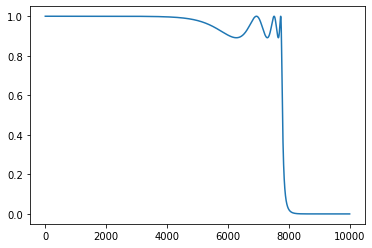

In [320]:
plt.plot(get_response_log2(b, a, samplerate, 10000))
plt.show()

In [299]:
numSamples = 10
niq = 40
output = np.zeros(numSamples) 

niqc = np.log2(niq)
print(niqc)

for i in range(0, numSamples):
    output[i] = pow(2, (i * ( niqc / numSamples)))

output



5.321928094887363


array([ 1.        ,  1.44612555,  2.09127911,  3.02425215,  4.3734483 ,
        6.32455532,  9.14610104, 13.22641039, 19.12705   , 27.66011569])

In [296]:
np.log2(8)

3.0